#### Import the random library

In [1]:
import numpy as np

#### Simulate a coin flip using random numbers

In [7]:
heads = 0
tails = 0

flips = int(input("How many flips would you like? "))
for f in range(flips):
    flip = np.random.randint(0,2)
    if (flip == 1):
        heads = heads + 1
        print("Heads")
    else:
        tails = tails + 1
        print("Tails")
print("Flipped", flips, "times")
print("Got ", (float(heads)/float(flips)), "% heads")
print("Got ", (float(tails)/float(flips)), "% tails")   

How many flips would you like?  25


Tails
Heads
Heads
Tails
Heads
Heads
Tails
Tails
Tails
Heads
Heads
Tails
Heads
Heads
Tails
Tails
Tails
Tails
Heads
Heads
Tails
Heads
Tails
Heads
Tails
Flipped 25 times
Got  0.48 % heads
Got  0.52 % tails


#### Bike sharing simulation. NDMU starts with 10 bikes and Loyola starts with 5. If NDMU students are 70% likely to borrow a bike and Loyola students are 50% likely to borrow a bike, can be make it through 100 iterations before either school runs out of bikes?

In [8]:
# initial conditions
ndmuBikes = 10
loyolaBikes = 5

# try to loop 100 times, let's see if we make it to the end
for i in range(100):

    # ask for two random numbers between 0.0 and 1.0
    ndmuStudent = np.random.random()
    loyolaStudent = np.random.random()

    # NDMU students are 70% likely to borrow a bike
    # we'll assign 0.0 to 0.3 as "not choosing to take a bike"
    # we'll assign 0.31 to 1.0 as "taking a bike"
    # this give us the desired 70% probability
    if ( ndmuStudent >= 0.3 ):
        ndmuBikes = ndmuBikes - 1
        loyolaBikes = loyolaBikes + 1
    
    # similar idea as above. Loyola students are 50% likely to take
    # a bike. Here, we divide our range into two equal parts
    # [0,0.5] as "not borrowing a bike" and [0.51, 1.0] as "borrowing a bike"
    if ( loyolaBikes >= 0.5 ):
        loyolaBikes = loyolaBikes - 1
        ndmuBikes = ndmuBikes + 1

    # output our status
    print("Timestep: ", i+1, ", NDMU Bikes: ", ndmuBikes,", Loyola Bikes: ", loyolaBikes)
    
    # add a check to see if we've run out of bikes
    if ( ndmuBikes == 0 or loyolaBikes == 0 ):
        print("We ran out of bikes")
        break # break tells Python we need to exit the loop

Timestep:  1 , NDMU Bikes:  10 , Loyola Bikes:  5
Timestep:  2 , NDMU Bikes:  10 , Loyola Bikes:  5
Timestep:  3 , NDMU Bikes:  10 , Loyola Bikes:  5
Timestep:  4 , NDMU Bikes:  11 , Loyola Bikes:  4
Timestep:  5 , NDMU Bikes:  11 , Loyola Bikes:  4
Timestep:  6 , NDMU Bikes:  12 , Loyola Bikes:  3
Timestep:  7 , NDMU Bikes:  13 , Loyola Bikes:  2
Timestep:  8 , NDMU Bikes:  13 , Loyola Bikes:  2
Timestep:  9 , NDMU Bikes:  13 , Loyola Bikes:  2
Timestep:  10 , NDMU Bikes:  13 , Loyola Bikes:  2
Timestep:  11 , NDMU Bikes:  13 , Loyola Bikes:  2
Timestep:  12 , NDMU Bikes:  14 , Loyola Bikes:  1
Timestep:  13 , NDMU Bikes:  14 , Loyola Bikes:  1
Timestep:  14 , NDMU Bikes:  14 , Loyola Bikes:  1
Timestep:  15 , NDMU Bikes:  15 , Loyola Bikes:  0
We ran out of bikes


#### Bike simulation with a loop to run the simulation 1000 times

In [9]:
# variable to keep track of when we ran out of bikes
simEnds = []

for x in range(1000):
    
    # initial conditions
    ndmuBikes = 10
    loyolaBikes = 5

    # try to loop 100 times, let's see if we make it to the end
    for i in range(100):

        # ask for two random numbers between 0.0 and 1.0
        ndmuStudent = np.random.random()
        loyolaStudent = np.random.random()

        # NDMU students are 70% likely to borrow a bike
        # we'll assign 0.0 to 0.3 as "not choosing to take a bike"
        # we'll assign 0.31 to 1.0 as "taking a bike"
        # this give us the desired 70% probability
        if ( ndmuStudent >= 0.3 ):
            ndmuBikes = ndmuBikes - 1
            loyolaBikes = loyolaBikes + 1
    
        # similar idea as above. Loyola students are 50% likely to take
        # a bike. Here, we divide our range into two equal parts
        # [0,0.5] as "not borrowing a bike" and [0.51, 1.0] as "borrowing a bike"
        if ( loyolaBikes >= 0.5 ):
            loyolaBikes = loyolaBikes - 1
            ndmuBikes = ndmuBikes + 1

        # output our status
        #print("Timestep: ", i+1, ", NDMU Bikes: ", ndmuBikes,", Loyola Bikes: ", loyolaBikes)
    
        # add a check to see if we've run out of bikes
        if ( ndmuBikes == 0 or loyolaBikes == 0 ):
            #print("We ran out of bikes")
            simEnds.append(i+1)
            break # break tells Python we need to exit the loop

In [10]:
simEnds[0:5] # let's look at a few values

[24, 20, 10, 15, 26]

#### Let's look at this as a histogram

Text(0.5,1,'Bike Simulation Results')

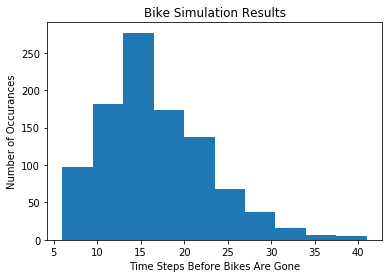

In [11]:
import matplotlib.pyplot as plt # import matplotlib with shorter name

# tell Python to do the plotting here, not on the server
%matplotlib inline 

plt.hist(simEnds)
plt.ylabel('Number of Occurances')
plt.xlabel('Time Steps Before Bikes Are Gone')
plt.title('Bike Simulation Results')

#### How many bikes should be have to make it to 100 time steps?

In [12]:
finished = False
newBikes = 1
startNdmuBikes = 10
startLoyolaBikes = 5
        
while not finished:

    # We know that 10 and 5 bikes doesn't work
    # Let's add 1 bike to each school
    ndmuBikes = startNdmuBikes + newBikes
    loyolaBikes = startLoyolaBikes + newBikes
        
    # This part is the same as before
    for i in range(100):

        ndmuStudent = np.random.random()
        loyolaStudent = np.random.random()

        if ( ndmuStudent >= 0.3 ):
            ndmuBikes = ndmuBikes - 1
            loyolaBikes = loyolaBikes + 1

        if ( loyolaStudent >= 0.5 ):
            loyolaBikes = loyolaBikes - 1
            ndmuBikes = ndmuBikes + 1

        if ( ndmuBikes == 0 or loyolaBikes == 0 ):
            
            # if we ran out of bikes then let's update 
            # how many additional bikes to buy
            newBikes = newBikes + 1
            break
            
        if ( i == 99 ):
            finished = True
            
print("The optimal number of bikes to start with is:")
print("NDMU:", startNdmuBikes+newBikes)
print("Loyola:", startLoyolaBikes+newBikes)

The optimal number of bikes to start with is:
NDMU: 14
Loyola: 9


In [13]:
ndmuResults = []
loyolaResults = []

for x in range(1000):
    
    finished = False
    newBikes = 1
    startNdmuBikes = 10
    startLoyolaBikes = 5
        
    while not finished:

        # We know that 10 and 5 bikes doesn't work
        # Let's add 1 bike to each school
        ndmuBikes = startNdmuBikes + newBikes
        loyolaBikes = startLoyolaBikes + newBikes
        
        # This part is the same as before
        for i in range(100):

            ndmuStudent = np.random.random()
            loyolaStudent = np.random.random()

            if ( ndmuStudent >= 0.3 ):
                ndmuBikes = ndmuBikes - 1
                loyolaBikes = loyolaBikes + 1

            if ( loyolaStudent >= 0.5 ):
                loyolaBikes = loyolaBikes - 1
                ndmuBikes = ndmuBikes + 1

            if ( ndmuBikes == 0 or loyolaBikes == 0 ):
            
                # if we ran out of bikes then let's update 
                # how many additional bikes to buy
                newBikes = newBikes + 1
                break
            
            if ( i == 99 ):
                finished = True
    
    ndmuResults.append(startNdmuBikes+newBikes)
    loyolaResults.append(startLoyolaBikes+newBikes)

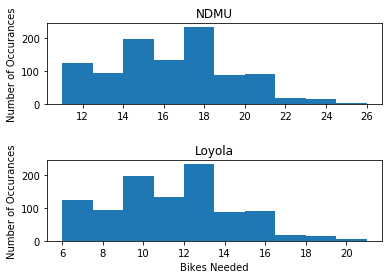

In [14]:
plt.subplot(2, 1, 1)
plt.hist(ndmuResults)
plt.ylabel('Number of Occurances')
plt.title('NDMU')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.hist(loyolaResults)
plt.ylabel('Number of Occurances')
plt.xlabel('Bikes Needed')
plt.title('Loyola')

# adjust the spacing so the title don't run into each other
# expressed as a praction of the height of each plot
plt.subplots_adjust(hspace=.7)

#### If we bought 26 bikes for NDMU and 20 bikes for Loyola then we will cover all outcomes

#### Yet, as our histograms show, some of these outcomes are unlikely

#### When dealing with probabilities there's not much we can say for sure. We can give potential outcomes and decide what to do from there based on available resources, etc.